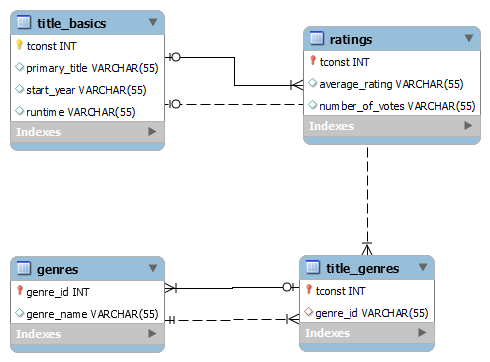

In [96]:
# imports
import pandas as pd
import numpy as np

In [97]:
# loading the file
akas  = pd.read_csv("Data/title-akas-us-only.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_2368\516399569.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas  = pd.read_csv("Data/title-akas-us-only.csv")


In [98]:
# checking the file
akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452564 entries, 0 to 1452563
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1452564 non-null  object
 1   ordering         1452564 non-null  int64 
 2   title            1452564 non-null  object
 3   region           1452564 non-null  object
 4   language         1452564 non-null  object
 5   types            1452564 non-null  object
 6   attributes       1452564 non-null  object
 7   isOriginalTitle  1452564 non-null  object
dtypes: int64(1), object(7)
memory usage: 88.7+ MB


In [99]:
# getting the first five rows
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
1,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
2,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
3,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
4,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0


In [100]:
# saving the basics
basics = pd.read_csv("Data/title.basics.tsv.gz", sep='\t', low_memory=False)

In [101]:
# Filter the basics table down to only include the US by using the filter akas dataframe
filter_us_titles = basics['tconst'].isin(akas['titleId'])
basics = basics[filter_us_titles]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10016872,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,\N,58,Family
10016901,tt9916620,movie,The Copeland Case,The Copeland Case,0,\N,\N,\N,Drama
10016939,tt9916702,short,Loving London: The Playground,Loving London: The Playground,0,\N,\N,\N,"Drama,Short"
10016962,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,\N,\N,Short


In [102]:
# checking the basics informations
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1365643 entries, 0 to 10016966
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          1365643 non-null  object
 1   titleType       1365643 non-null  object
 2   primaryTitle    1365643 non-null  object
 3   originalTitle   1365643 non-null  object
 4   isAdult         1365643 non-null  object
 5   startYear       1365643 non-null  object
 6   endYear         1365643 non-null  object
 7   runtimeMinutes  1365643 non-null  object
 8   genres          1365643 non-null  object
dtypes: object(9)
memory usage: 104.2+ MB


In [103]:
# converting to true null values to identify missing genres and runtimes
basics = basics.replace({'\\N':np.nan})

In [104]:
# drop rows with null values in the runtime and genre columns only
basics = basics.dropna(subset=['runtimeMinutes', 'genres'])

In [105]:
# filter only full-length movies
basics = basics[basics['titleType']=='movie']

In [106]:
# convert startyear to float
basics['startYear'] = basics['startYear'].astype(float)

In [107]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203476 entries, 8 to 10016777
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          203476 non-null  object 
 1   titleType       203476 non-null  object 
 2   primaryTitle    203476 non-null  object 
 3   originalTitle   203476 non-null  object 
 4   isAdult         203476 non-null  object 
 5   startYear       199907 non-null  float64
 6   endYear         0 non-null       object 
 7   runtimeMinutes  203476 non-null  object 
 8   genres          203476 non-null  object 
dtypes: float64(1), object(8)
memory usage: 15.5+ MB


In [108]:
# filter to keep movies in startyear from 2000 to 2022
basics = basics[(basics['startYear']>=2000) & (basics['startYear']<=2022)]

In [109]:
# creating filter
filter_documentaries = basics['genres'].str.contains('Documentary')
# Exclude movies in the documentary category.
basics = basics[~filter_documentaries]

In [110]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86979 entries, 34802 to 10016777
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          86979 non-null  object 
 1   titleType       86979 non-null  object 
 2   primaryTitle    86979 non-null  object 
 3   originalTitle   86979 non-null  object 
 4   isAdult         86979 non-null  object 
 5   startYear       86979 non-null  float64
 6   endYear         0 non-null      object 
 7   runtimeMinutes  86979 non-null  object 
 8   genres          86979 non-null  object 
dtypes: float64(1), object(8)
memory usage: 6.6+ MB


In [111]:
# rechecking basics
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34802,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
61114,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
67666,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
86793,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
93930,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [112]:
# Save to CSV
basics.to_csv('Data/filtered_title_basics.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'Data/filtered_title_basics.csv'

In [ ]:
# saving basics
ratings = pd.read_csv("Data/title.ratings.tsv.gz", sep='\t', low_memory=False)

In [ ]:
# checking the ratings
ratings.info()

In [ ]:
# Keep only movies that are included in your final title basics dataframe
filter_basics = ratings['tconst'].isin(basics['tconst'])
ratings = ratings[filter_basics]

In [ ]:
# filtering the ratings dataframe
ratings = ratings.replace({'\\N':np.nan})

In [ ]:
# checking the info
ratings.info()

In [29]:
# checking the first five rows
ratings.head()

,tconst,averageRating,numVotes
17961,tt0035423,6.4,87153
40764,tt0062336,6.4,175
46645,tt0069049,6.7,7754
63640,tt0088751,5.2,336
69953,tt0096056,5.6,846


In [ ]:
# saving the new title
ratings.to_csv('Data/filtered_title_ratings.csv', index=False)

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

In [ ]:
username = 'root'
password = 'root'
hostname = 'localhost'
port = '3306'  # Default MySQL port is 3306
database_name = 'mydb'

In [ ]:
connection_string = f'mysql+pymysql://{username}:{password}@{hostname}:{port}/{database_name}'

In [ ]:
engine = create_engine(connection_string)

In [ ]:
conn = engine.connect()

In [ ]:
# Preview the names of all tables 
q = '''SHOW TABLES;'''
pd.read_sql(q, conn)

In [ ]:
# Describe genres
q = '''DESCRIBE genres;'''
describe = pd.read_sql(q, conn)
describe

In [ ]:
# Describe ratings
q = '''DESCRIBE ratings;'''
describe = pd.read_sql(q, conn)
describe

In [67]:
# Describe ratings
q = '''DESCRIBE title_basics;'''
describe = pd.read_sql(q, conn)
describe

,Field,Type,Null,Key,Default,Extra
0,tconst,int,NO,PRI,None,
1,primary_title,varchar(55),YES,,None,
2,start_year,varchar(55),YES,,None,
3,runtime,varchar(55),YES,,None,


In [ ]:
# Describe ratings
q = '''DESCRIBE title_genres;'''
describe = pd.read_sql(q, conn)
describe

NameError: name 'title' is not defined